In [1]:
## Q3 ##

In [3]:
# a #

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [85]:
data = pd.read_csv('HW4_Q3_data.csv', header = None)
negative = pd.read_csv('HW4_Q3_neg.csv', header = None)
positive = pd.read_csv('HW4_Q3_pos.csv', header = None)
print(data)

             0
0     5.051466
1     5.733980
2     5.882876
3     6.348639
4     6.567216
..         ...
295  36.635155
296  37.120295
297  39.460292
298  41.108045
299  43.371682

[300 rows x 1 columns]


In [87]:
new = data[0].values #using 0 as a name for the column (header) to make a numpy array
neg = negative[0].values
pos = positive[0].values

total_data = {'Neg': neg,
        'Pos': pos,
        'Field': new
}

<Axes: >

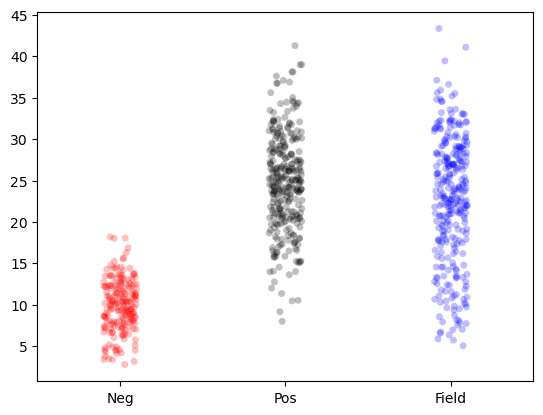

In [89]:
sns.stripplot(data = total_data, palette = ['red', 'black', 'blue'], jitter = True, alpha = 0.25)

In [91]:
# b #

In [111]:
def above_below(cutoff, data):
    above = np.sum(data > cutoff)
    below = len(data) - above
    return above, below
    
def se(cutoff, data_pos):
    numTP, numFN = above_below(cutoff, data_pos)
    my_se = numTP / (numTP + numFN)
    return my_se
    
def sp(cutoff, data_neg):
    numFP, numTN = above_below(cutoff, data_neg)
    my_sp = numTN / (numTN + numFP)
    return my_sp
      
def theta(cutoff, data_field, data_pos, data_neg): #mean estimate
    numPos, numNeg = above_below(cutoff, data_field)
    my_se = se(cutoff, data_pos)
    my_sp = sp(cutoff, data_neg)
    my_theta = (numPos / (numPos + numNeg) - (1 - my_sp)) / (my_se + my_sp - 1)
    return my_theta
    
def phi(cutoff, data_field, data_pos, data_neg): #Pr(test +) estimate
    my_se = se(cutoff, data_pos)
    my_sp = sp(cutoff, data_neg)
    my_theta = theta(cutoff, data_field, data_pos, data_neg)
    my_phi = my_theta * (my_se + my_sp - 1) + (1 - my_sp)
    return my_phi

In [130]:
def Youden(cutoff, data_pos, data_neg):
    J = se(cutoff, data_pos) + sp(cutoff, data_neg) - 1
    return J
J = []
c_log = []
c = 0
while c < 46:
    J.append(Youden(c, pos, neg))
    c_log.append(c)
    c += 1
J_max = max(J)
J_index = J.index(J_max)

In [ ]:
# c #

Text(0, 0.5, 'Youden Values')

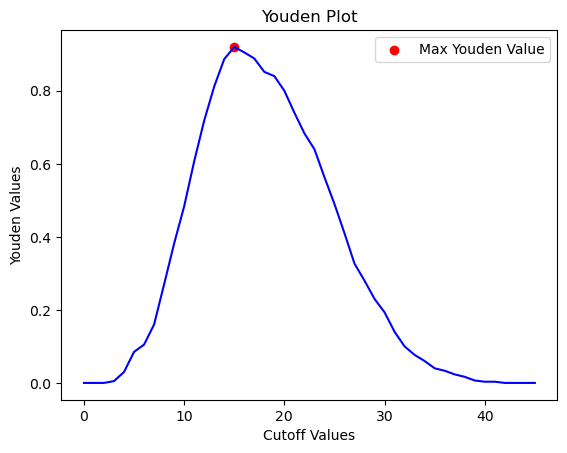

In [142]:
fig,ax = plt.subplots()
ax.plot(c_log, J, color = 'blue')
ax.scatter(J_index, J_max, color = 'red', label = 'Max Youden Value')
plt.title('Youden Plot')
plt.legend()
ax.set_xlabel('Cutoff Values') 
ax.set_ylabel('Youden Values')

In [146]:
print(J_max)
print(J_index)

0.9199999999999999
15


/tmp/ipykernel_347/960908217.py:20: RuntimeWarning: invalid value encountered in scalar divide
  my_theta = (numPos / (numPos + numNeg) - (1 - my_sp)) / (my_se + my_sp - 1)
/tmp/ipykernel_347/960908217.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  my_theta = (numPos / (numPos + numNeg) - (1 - my_sp)) / (my_se + my_sp - 1)


Text(0, 0.5, 'Theta Values')

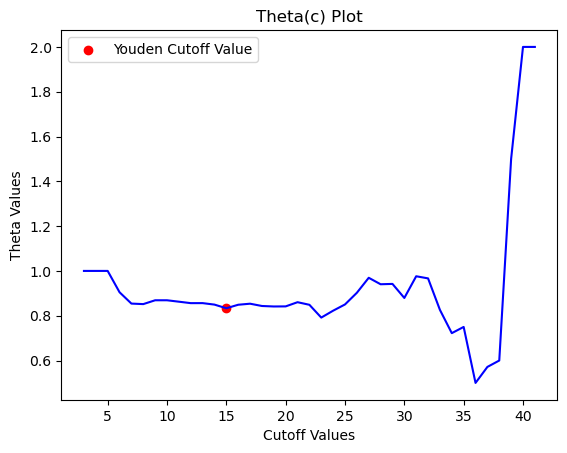

In [163]:
theta_c = []
c_log2 = []
c2 = 0
while c2 < 46:
    theta_c.append(theta(c2, new, pos, neg))
    c_log2.append(c2)
    c2 += 1

fig,ax = plt.subplots()
ax.plot(c_log2, theta_c, color = 'blue')
ax.scatter(15, theta_c[15], color = 'red', label = 'Youden Cutoff Value')
plt.title('Theta(c) Plot')
plt.legend()
ax.set_xlabel('Cutoff Values') 
ax.set_ylabel('Theta Values')

In [158]:
theta_c

[nan,
 nan,
 nan,
 1.0000000000000222,
 1.0,
 1.0,
 0.9047619047619047,
 0.8541666666666674,
 0.8518518518518517,
 0.8689956331877726,
 0.8689655172413793,
 0.8626373626373626,
 0.8561484918793504,
 0.8562628336755648,
 0.849624060150376,
 0.8333333333333334,
 0.8489871086556169,
 0.853658536585366,
 0.8434442270058709,
 0.8412698412698414,
 0.8416666666666667,
 0.8603603603603605,
 0.848780487804878,
 0.7916666666666666,
 0.8224852071005915,
 0.8503401360544218,
 0.902439024390244,
 0.9693877551020408,
 0.9404761904761902,
 0.9420289855072465,
 0.8793103448275862,
 0.9761904761904753,
 0.9666666666666658,
 0.8260869565217392,
 0.7222222222222217,
 0.7499999999999993,
 0.49999999999999845,
 0.5714285714285692,
 0.6000000000000022,
 1.5000000000000153,
 1.999999999999954,
 1.999999999999954,
 inf,
 inf,
 nan,
 nan]